##  Problemas de Calibración:

### Pérez Pérez C. Joselyn 

#### 1. Escriba una función que cree la matriz del sistema presentado en la página 6.
#### 2. Realice el ejercicio que se describe en la página 9.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Datos
TA= 1.0
TB= 1.0
L= 1.0
S= 0.0
k=1.0
N=21

#Definimos la función para la matriz

def buildMatrix(N,d):
    Mat=np.zeros((N,N))
    for i in range (0, N-1):
        Mat[i+1,i]=-1
        Mat[i,i+1]=-1
    for i in range(0,N):
        Mat[i,i]=2-d
    return Mat

In [4]:
#Utilizamos como base el ejercicio visto en clase

#Parametros físicos
def funcion(k, S, L, TA, TB, N, w):
    """"
    Parameters
    ----------
    L:float
    L es la longitud del dominio
    
    k:float
    k es la conductividad del material
    
    S:float
    S es la fuente
    
    TA:float
    TA es la ocndición de frontera del lado izquierdo
    
    TB: float
    TB es la condición de frontera de la derecha
    
    N:int
    N es el número de nodos internos (grados de libertad)
    
    Return
    ------
    Esta función hace lagráfica de la solución
    """
    
    
    import numpy as np
    import matplotlib.pyplot as plt


    #Parametros numéricos
    h=L/(N+1)
    r=k/h**2
    d=(w**2)/r

    T=np.zeros(N+2)
    b=np.zeros(N)
    A=buildMatrix(N,d)

    b[:]=S/r
    T[0]=TA
    T[-1]=TB
    b[0]+= TA
    b[-1]+= TB

#Implementamos
    T[1:N+1] = np.linalg.solve(A,b)
    x=[h*i for i in range (1, N+1)]
    x.insert(0,0)
    x.append(L)
    
    print("Valores obtenidos")
    print("")
    print(T)
    plt.plot(x, T, 'o-', color="k")
    plt.plot(x,T)
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.show()


Valores obtenidos

[ 1.          1.30272968  1.43942855  1.39267454  1.16842639  0.79526416
  0.32074678 -0.19464927 -0.68523757 -1.08849344 -1.35302256 -1.44511112
 -1.35302256 -1.08849344 -0.68523757 -0.19464927  0.32074678  0.79526416
  1.16842639  1.39267454  1.43942855  1.30272968  1.        ]


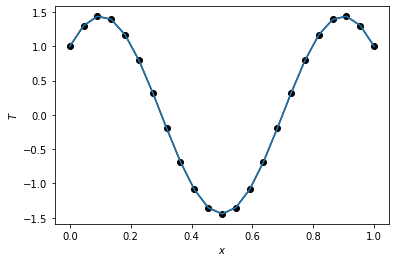

In [5]:
#Ahora si 
w=2.5*np.pi 

funcion(k, S, L, TA, TB, N, w)